# Algoritmos de optimización - Reto 1

Nombre: Raúl Peinado García <br> 
Github: https://github.com/raulpg1<br> 

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [5]:
def print_estado(src,aux,dst):
    print("Torre src ",src)
    print("Torre aux ",aux)
    print("Torre dst ",dst)
    print("-----------------")

In [18]:
def hanoi(n,src,aux,dst):
    if n > 0:
        hanoi(n-1,src,dst,aux)
        disco = src.pop()
        dst.append(disco)
        print_estado(inicio,auxiliar,destino)
        hanoi(n-1,aux,src,dst) 

In [23]:
num_torres = 2
inicio,auxiliar,destino = (["d"+str(i) for i in range(num_torres,0,-1)],[],[])
print("- - ESTADO INICIAL - -")
print_estado(inicio,auxiliar,destino)
hanoi(num_torres ,inicio,auxiliar,destino)

- - ESTADO INICIAL - -
Torre src  ['d2', 'd1']
Torre aux  []
Torre dst  []
-----------------
Torre src  ['d2']
Torre aux  ['d1']
Torre dst  []
-----------------
Torre src  []
Torre aux  ['d1']
Torre dst  ['d2']
-----------------
Torre src  []
Torre aux  []
Torre dst  ['d2', 'd1']
-----------------


In [29]:
num_torres = 3
inicio,auxiliar,destino = (["d"+str(i) for i in range(num_torres,0,-1)],[],[])
print("- - ESTADO INICIAL - -")
print_estado(inicio,auxiliar,destino)
hanoi(num_torres ,inicio,auxiliar,destino)

- - ESTADO INICIAL - -
Torre src  ['d3', 'd2', 'd1']
Torre aux  []
Torre dst  []
-----------------
Torre src  ['d3', 'd2']
Torre aux  []
Torre dst  ['d1']
-----------------
Torre src  ['d3']
Torre aux  ['d2']
Torre dst  ['d1']
-----------------
Torre src  ['d3']
Torre aux  ['d2', 'd1']
Torre dst  []
-----------------
Torre src  []
Torre aux  ['d2', 'd1']
Torre dst  ['d3']
-----------------
Torre src  ['d1']
Torre aux  ['d2']
Torre dst  ['d3']
-----------------
Torre src  ['d1']
Torre aux  []
Torre dst  ['d3', 'd2']
-----------------
Torre src  []
Torre aux  []
Torre dst  ['d3', 'd2', 'd1']
-----------------


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

In [50]:
#Sucesión_de_Fibonacci
def recc_fib(n):
    if n == 1:
        return 0
    elif n <=3:
        return 1
    else:
        return recc_fib(n-1)+recc_fib(n-2)

In [51]:
def iter_fib(n):
    fib = [1,1]
    for elem in range(3,n):
        fib.append(fib[-2]+fib[-1])
    return fib[-1]

In [62]:
for elem in range (2,18,3):
    print(f'Número {elem} de la sucesión de fib para el algoritmo recursivo \t{recc_fib(elem)}')
    print(f'Número {elem} de la sucesión de fib para el algoritmo recursivo \t{iter_fib(elem)}\n')

Número 2 de la sucesión de fib para el algoritmo recursivo 	1
Número 2 de la sucesión de fib para el algoritmo recursivo 	1

Número 5 de la sucesión de fib para el algoritmo recursivo 	3
Número 5 de la sucesión de fib para el algoritmo recursivo 	3

Número 8 de la sucesión de fib para el algoritmo recursivo 	13
Número 8 de la sucesión de fib para el algoritmo recursivo 	13

Número 11 de la sucesión de fib para el algoritmo recursivo 	55
Número 11 de la sucesión de fib para el algoritmo recursivo 	55

Número 14 de la sucesión de fib para el algoritmo recursivo 	233
Número 14 de la sucesión de fib para el algoritmo recursivo 	233

Número 17 de la sucesión de fib para el algoritmo recursivo 	987
Número 17 de la sucesión de fib para el algoritmo recursivo 	987



Comparación del tiempo de ejecución con las dos implementaciones anteriores

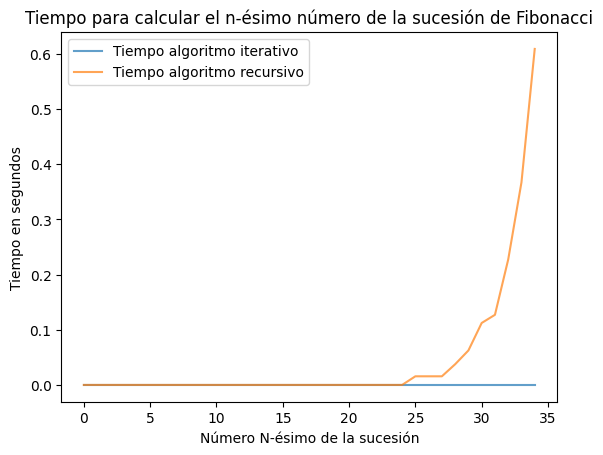

In [63]:
import time
import matplotlib.pyplot as plt

time_iter = []
time_rec = []
for i in range(0,35):

    inic = time.time()
    iter_fib(i)
    time_iter.append(time.time()-inic)

    inic = time.time()
    recc_fib(i)
    time_rec.append(time.time()-inic)
    
plt.plot(time_iter, label="Tiempo algoritmo iterativo", alpha=0.7)
plt.plot(time_rec, label="Tiempo algoritmo recursivo", alpha=0.7)
plt.xlabel("Número N-ésimo de la sucesión")
plt.ylabel("Tiempo en segundos")
plt.title("Tiempo para calcular el n-ésimo número de la sucesión de Fibonacci")
plt.legend()

Como se puede ver, el tiempo del método iterativo es mucho menor que el del recursivo. El método iterativo tiene una complejidad O(n), mientras que el recursivo es O(2^n)

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [45]:
# Problema del cambio de moneda
def cambio_voraz(monedas,cambio):
    sol = []
    while sum(sol) < cambio:
        for m in monedas:
            if sum(sol) + m <= cambio:
                sol.append(m)
                break
    return sol

In [46]:
cambio_voraz(monedas= [11,5,1],cambio = 17)

[11, 5, 1]

In [48]:
cambio_voraz(monedas=[11,5,1],cambio = 15) # error ya que no es el menor número de monedas posible

[11, 1, 1, 1, 1]

El algoritmo voraz intentará elegir siempre el mayo valor de moneda que sea posible. No siempr es la mejor solucion al problema.

## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [30]:
def n_reinas_backtraking(sol,fila,N):  
    if fila == N: 
        return f"\tSol para {N} reinas -> "+str(sol)
    for columna in range(N):
        sol[fila] = columna
        if es_sol(sol,fila):
            solucion = n_reinas_backtraking(sol,fila+1,N)
            if solucion is not None:
                print(solucion) 
            sol[fila:] = -1

In [31]:
def es_sol(sol,etapa):
    for i in range(0,etapa):
        if (sol[i] == sol[etapa]) or (abs(sol[i]-sol[etapa]) == abs(i-etapa)):
            return False
    return True

In [32]:
import numpy as np
for elem in range(4,7):
    N = elem
    vect_sol = np.full(N, -1)
    print(f"Soluciones para el problema de las {N} reinas:")
    n_reinas_backtraking(vect_sol,0,N)
    print("\n")

Soluciones para el problema de las 4 reinas:
	Sol para 4 reinas -> [1 3 0 2]
	Sol para 4 reinas -> [2 0 3 1]


Soluciones para el problema de las 5 reinas:
	Sol para 5 reinas -> [0 2 4 1 3]
	Sol para 5 reinas -> [0 3 1 4 2]
	Sol para 5 reinas -> [1 3 0 2 4]
	Sol para 5 reinas -> [1 4 2 0 3]
	Sol para 5 reinas -> [2 0 3 1 4]
	Sol para 5 reinas -> [2 4 1 3 0]
	Sol para 5 reinas -> [3 0 2 4 1]
	Sol para 5 reinas -> [3 1 4 2 0]
	Sol para 5 reinas -> [4 1 3 0 2]
	Sol para 5 reinas -> [4 2 0 3 1]


Soluciones para el problema de las 6 reinas:
	Sol para 6 reinas -> [1 3 5 0 2 4]
	Sol para 6 reinas -> [2 5 1 4 0 3]
	Sol para 6 reinas -> [3 0 4 1 5 2]
	Sol para 6 reinas -> [4 2 0 5 3 1]


